In [1]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake

2024-10-31 09:12:50.768726: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 09:12:50.769176: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-31 09:12:50.772194: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-31 09:12:50.805129: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-31 09:12:51.420932: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
drichlet_ids = [1,2,5,6]
side_ids = []
invert_thwaites = Invert(outline = 'data/geojson/thwaites.geojson', mesh_name = 'thwaites', reg_constant_c  = 0.1, read_mesh = False,opts = None, drichlet_ids = drichlet_ids , lcar = 9e3)

Reading local outline
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='meters'>)

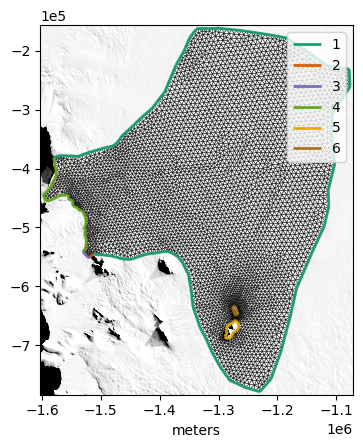

In [3]:
invert_thwaites.plot_mesh()

In [4]:
invert_thwaites.import_velocity_data(constant_val=0.01)
invert_thwaites.import_geophysics_data(name_list=['data/geophysics/ADMAP_MagneticAnomaly_5km.tif', 
                                                'data/geophysics/ANTGG_BouguerAnomaly_10km.tif', 
                                                'data/geophysics/GeothermalHeatFlux_5km.tif',
                                                'data/geophysics/ALBMAP_SurfaceAirTemperature_5km.tif',
                                                'data/geophysics/EIGEN-6C4_GravityDisturbance_10km.tif',
                                                'data/geophysics/ALBMAP_SnowAccumulation_Arthern_5km.tif',
                                                'data/geophysics/Englacial_temp_Pattyn_2013.tif'])

Reading velocity from measures database
C0 is constant: 0.01


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Englacial Temperature'}, xlabel='meters'>)

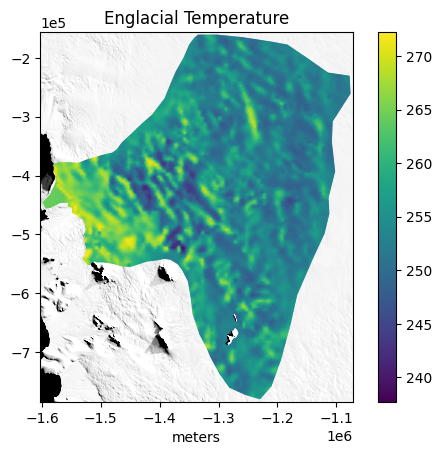

In [5]:
invert_thwaites.plot_englacial_temp()

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Englacial Temperature'}, xlabel='meters'>)

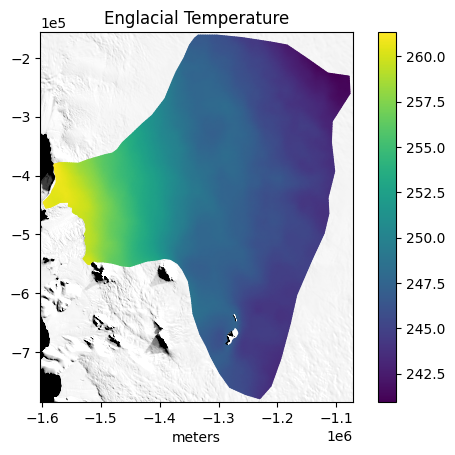

In [7]:
invert_thwaites.plot_scalar_field(invert_thwaites.surface_air_temp_kelvin)

In [5]:
#invert_thwaites.import_velocity_data(C = 'driving-stress')

In [6]:
u =  invert_thwaites.simulation()
firedrake.assemble(invert_thwaites.loss_functional_nosigma(u))
# C0 = 0.01: 214429852.94000015
# C0 = driving stress: 12774525.283579238

214429852.93999872

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Error in U'}, xlabel='meters'>)

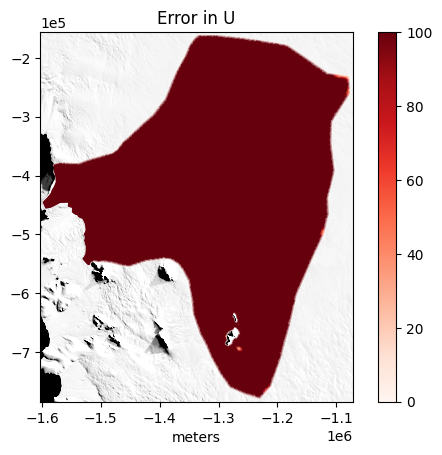

In [7]:
invert_thwaites.plot_u_error_no_sigma(u, vmax = 100)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Error in U'}, xlabel='meters'>)

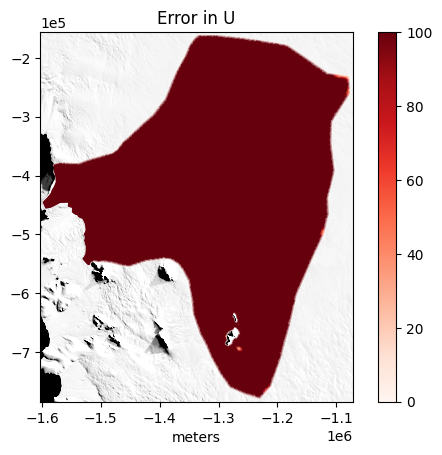

In [8]:
invert_thwaites.plot_u_error_no_sigma(u, vmax = 100)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '% Error in U'}, xlabel='meters'>)

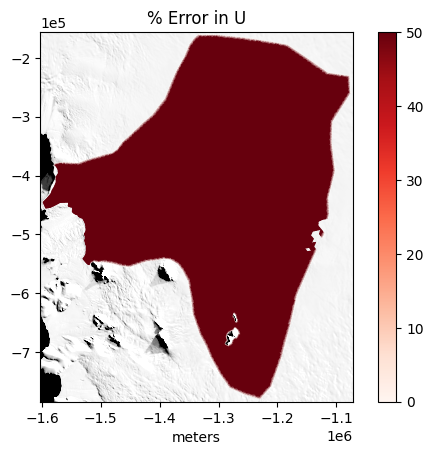

In [9]:
invert_thwaites.plot_u_error_percentage(u, vmax = 50)

In [10]:
invert_thwaites.default_u = u

In [11]:
#df = invert_thwaites.get_dataframe(u)
#df.to_csv('thwaites_baseline_geo_12_2_1.csv')

In [4]:
invert_thwaites.invert_C(max_iterations=170, regularization_grad_fcn= True, loss_fcn_type = 'nosigma')

Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     2.144299e+08   1.018622e+04                  2.287534e+04   
  1     7.095641e+07   3.450582e+03   2.287534e+04   5.718834e+04   3         2         0         1         3         
  2     1.221682e+07   8.021791e+02   5.718834e+04   1.429708e+05   4         3         0         3         2         
  3     1.221682e+07   8.021791e+02   1.429708e+05   8.935678e+03   5         3         2         3         2         
  4     7.167832e+06   4.167078e+02   8.935678e+03   2.233919e+04   6         4         0         1         3         
  5     2.909351e+06   1.069110e+02   2.233919e+04   2.233919e+04   7         5         0         2         2         
  6     1.497031e+06   3.641965e+01   2.233919e+04   5.584799e+04   8         6         0         2         3         
  7     5.261877e+05   1.14003

In [5]:
u_optimized =  invert_thwaites.simulation()

In [6]:
firedrake.assemble(invert_thwaites.loss_functional_nosigma(u_optimized))
# c_reg 0.1: 695.1920399251572
# 1 : 707.0383730954823

700.3281112725566

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '% Error in U'}, xlabel='meters'>)

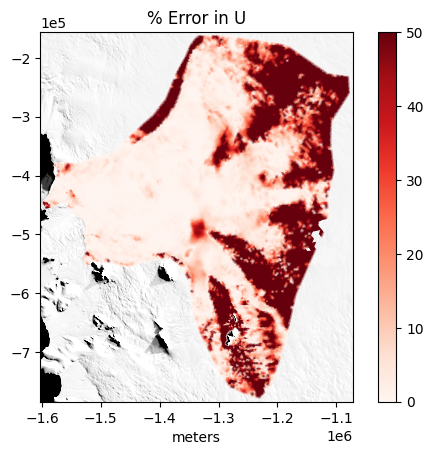

In [7]:
invert_thwaites.plot_u_error_percentage(u_optimized, vmax = 50)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Error in U'}, xlabel='meters'>)

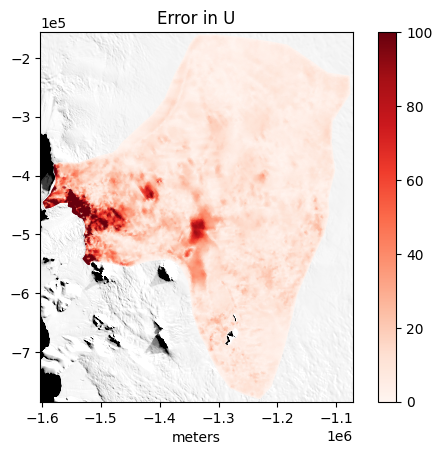

In [8]:
invert_thwaites.plot_u_error_no_sigma(u_optimized, vmax = 100)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$||V||$'}, xlabel='meters'>)

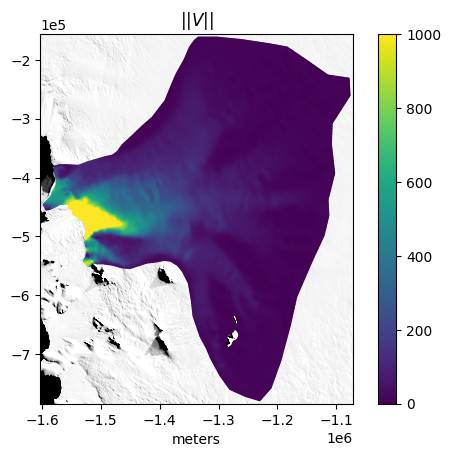

In [9]:
invert_thwaites.plot_u_mag(u_optimized, vmax = 1000)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Surface velocity streamlines'}, xlabel='meters'>)

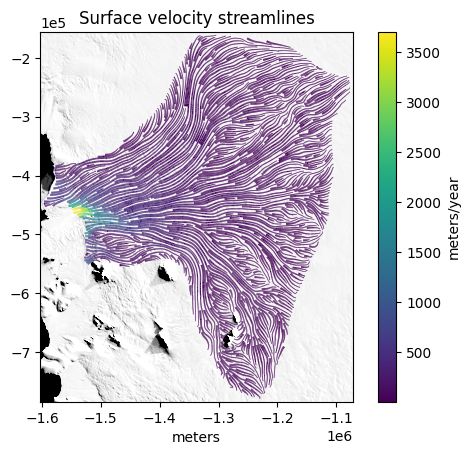

In [10]:
invert_thwaites.plot_streamline_u(u_optimized)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'C'}, xlabel='meters'>)

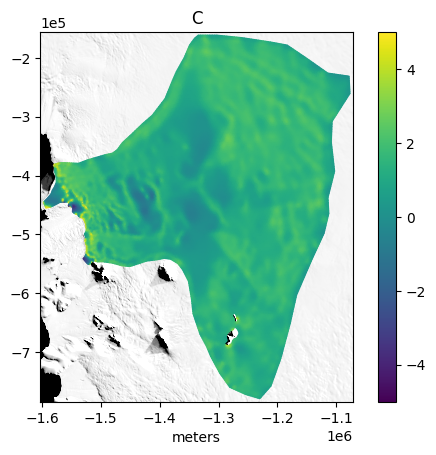

In [11]:
invert_thwaites.plot_C(vmin = -5, vmax=5)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$C_{b}$'}, xlabel='meters'>)

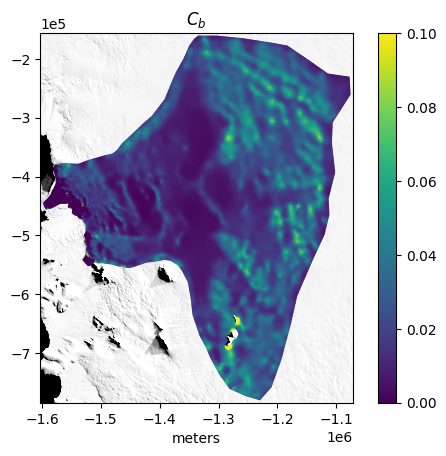

In [12]:
invert_thwaites.plot_C_total(vmax=0.1)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Grounding Line'}, xlabel='meters'>)

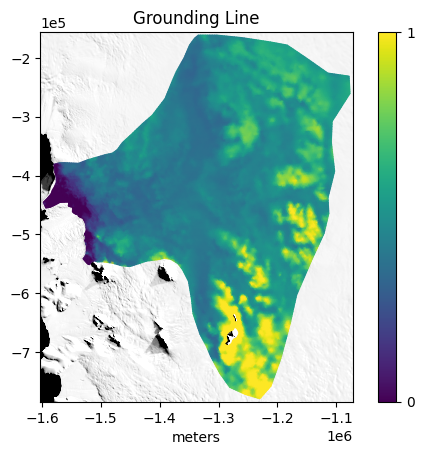

In [13]:
invert_thwaites.plot_grounding_line()

In [14]:
#invert_thwaites.inverse_u = invert_thwaites.u_initial
invert_thwaites.inverse_u = u_optimized

In [15]:
#theta = invert_thwaites.θ
C = invert_thwaites.C

In [16]:
df = invert_thwaites.get_dataframe(u_optimized)
df.to_csv('regularized_const_01C_C_only_thwaites_r01_geo_12.csv')

In [36]:
invert_thwaites.compute_C_ML_regress(filename = 'model_4_dotson2_thwaites1_r1_geo_static', half = False, flip = False, use_driving_stress = False, C_bounds = [-50, 55], θ_bounds =[-102, 200], number_of_models = 14)
u_optimized =  invert_thwaites.simulation()

/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [37]:
firedrake.assemble(invert_thwaites.loss_functional_nosigma(u_optimized))
# 120549.47831314373

433055.6327326819

In [38]:
df = invert_thwaites.get_dataframe(u_optimized)
df.to_csv('thwaites_ML_geo_4_static_2_1.csv')

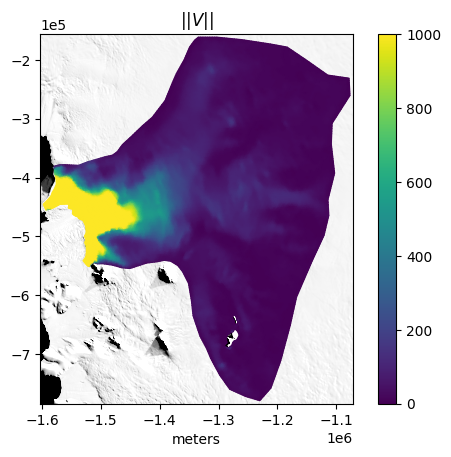

In [39]:
invert_thwaites.plot_u_mag(u_optimized, vmax = 1000)

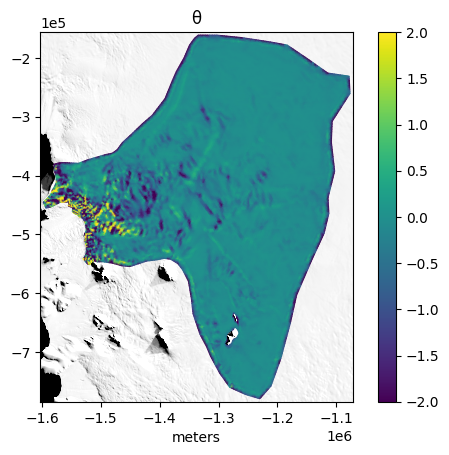

In [40]:
invert_thwaites.plot_theta(vmin = -2, vmax = 2)

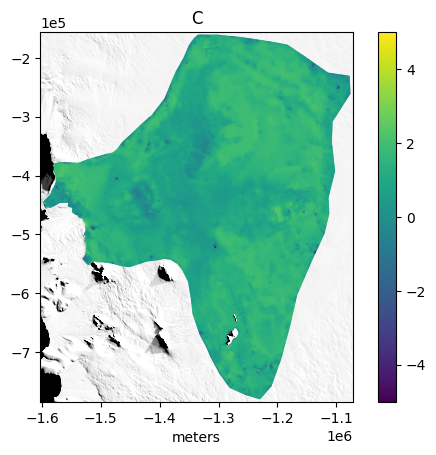

In [41]:
invert_thwaites.plot_C(vmin = -5, vmax = 5)

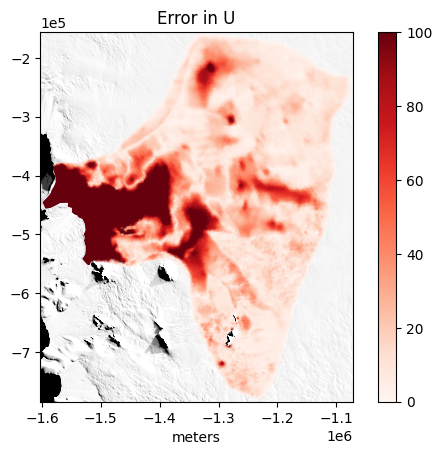

In [42]:
invert_thwaites.plot_u_error_no_sigma(u_optimized, vmax = 100)

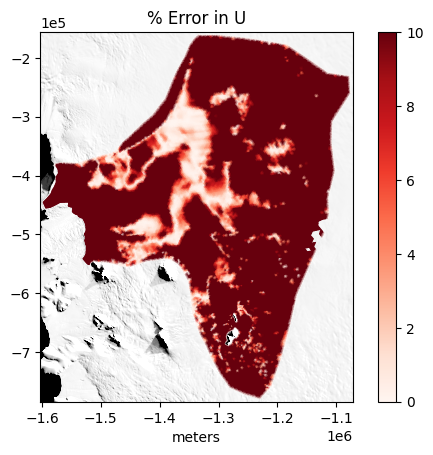

In [43]:
invert_thwaites.plot_u_error_percentage(u_optimized, vmax = 10)

In [44]:
invert_thwaites.ML_u = u_optimized

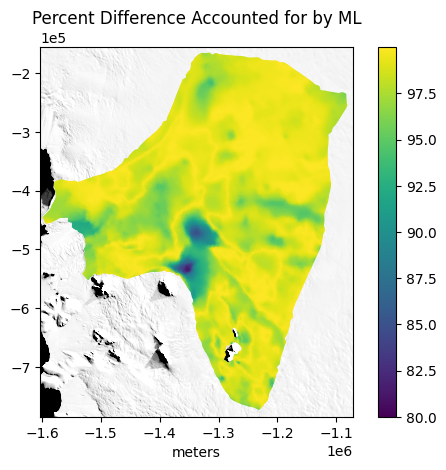

In [45]:
# Static2_1
invert_thwaites.plot_percent_accounted(vmin = 80)

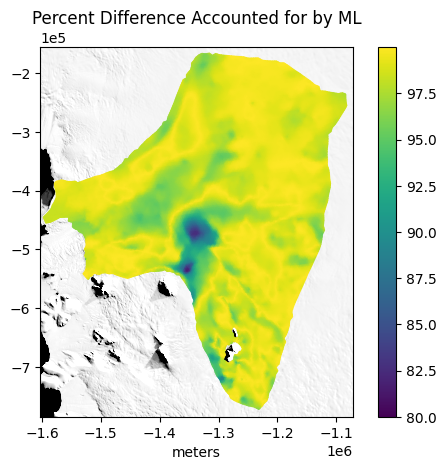

In [35]:
# Dynamic2_1
invert_thwaites.plot_percent_accounted(vmin = 80)

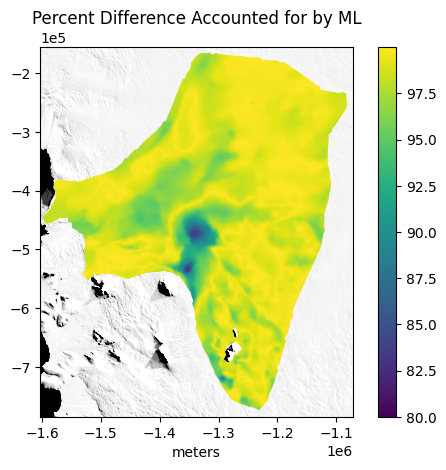

In [57]:
# Dynamic
invert_thwaites.plot_percent_accounted(vmin = 80)

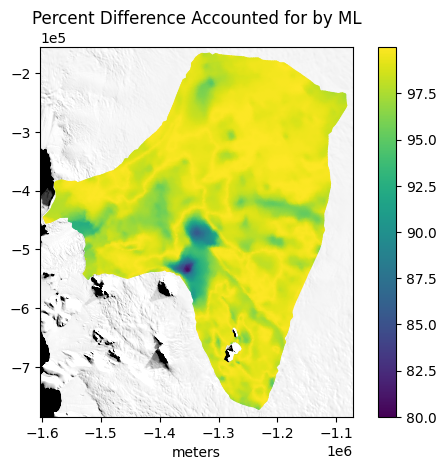

In [47]:
# Static
invert_thwaites.plot_percent_accounted(vmin = 80)